In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Allergen.csv',keep_default_na=False,na_values=[""])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   399 non-null    object 
 3   Fat/Oil                     399 non-null    object 
 4   Seasoning                   399 non-null    object 
 5   Allergens                   399 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


In [4]:
df.shape

(399, 9)

In [5]:
print(df.isnull().sum())

Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    1
dtype: int64


In [6]:
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(398, 9)
Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    0
dtype: int64


In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


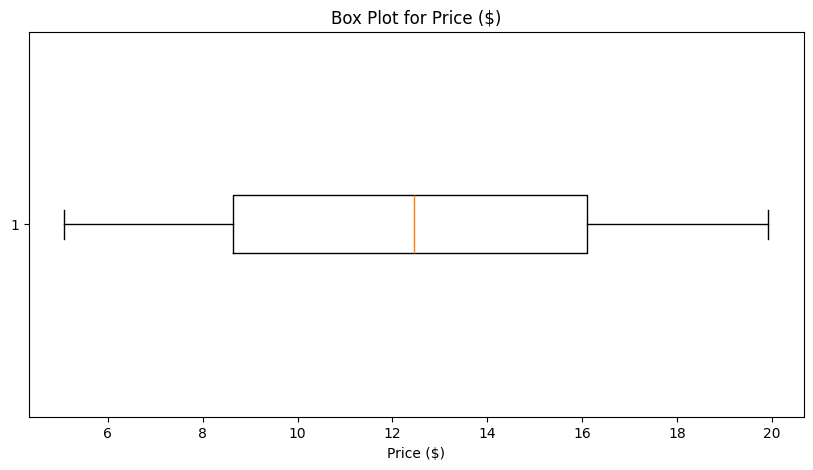

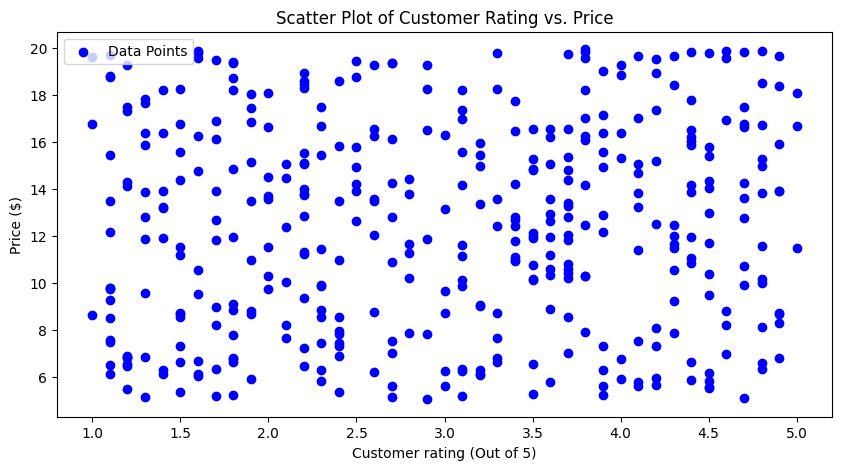

In [8]:
import matplotlib.pyplot as plt

# Box Plot for Price
plt.figure(figsize=(10, 5))
plt.boxplot(df['Price ($)'], vert=False)
plt.title('Box Plot for Price ($)')
plt.xlabel('Price ($)')
plt.show()

# Scatter Plot for Customer Rating vs. Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Customer rating (Out of 5)'], df['Price ($)'], label='Data Points', color='blue')
plt.title('Scatter Plot of Customer Rating vs. Price')
plt.xlabel('Customer rating (Out of 5)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [11]:
# Label Encoding for the 'Prediction' column
from sklearn.preprocessing import  MultiLabelBinarizer, LabelEncoder
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,0


In [12]:
df['Prediction'].value_counts()

Prediction
0    255
1    143
Name: count, dtype: int64

In [15]:
import category_encoders as ce
# Leave one out encoding for specified column
categorical_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning','Allergens']

# Initialize LeaveOneOutEncoder
encoder = ce.LeaveOneOutEncoder(cols=categorical_columns)

# Apply the encoder
df_encoded = encoder.fit_transform(df[categorical_columns], df['Price ($)'])

# Replace the original categorical columns with their encoded counterparts
df = pd.concat([df.drop(columns=categorical_columns), df_encoded], axis=1)


# Display the dataframe with LOO encoding
print(df.head())

   Price ($)  Customer rating (Out of 5)  Prediction  Food Product  \
0      10.15                         3.1           0      6.170000   
1       6.17                         4.5           0     10.150000   
2      19.65                         4.1           0     12.500000   
3      17.48                         4.7           0     13.223333   
4      10.83                         3.7           0     12.397588   

   Main Ingredient  Sweetener    Fat/Oil  Seasoning  Allergens  
0            6.170  12.343736  12.471786     13.408   6.170000  
1           10.150  12.387473  12.519167     13.806  10.150000  
2           17.480  12.371511  12.031228     11.584  17.480000  
3           19.650  12.379317  12.069298     11.801  19.650000  
4           17.925  12.403237  12.185965     12.466  12.072073  


In [16]:
output_path='output_dataset.csv'

# Write the DataFrame to a CSV file
df.to_csv(output_path, index=False)

In [18]:
import joblib
import os
encoder_path ='encoder.pkl'

#save the encoder
joblib.dump(encoder, encoder_path)

print(f"Encoder saved to {encoder_path}")

Encoder saved to encoder.pkl


In [19]:
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'Prediction'

# Separate the features and target variable
X = df.drop(columns=[target])
y = df[target]

In [20]:
# Step 2: Print the shape of both X and y to understand the data's dimensions.
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (398, 8)
Shape of y: (398,)


In [21]:
# Step 3: Perform a train-test split in an 80:20 ratio.
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Step 4: Perform another train-test split in a 70:30 ratio.
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Step 5: Print the shape of the 80:20 split data.
print("80:20 split shapes:")
print("X_train:", X_train_80.shape, "X_test:", X_test_80.shape)
print("y_train:", y_train_80.shape, "y_test:", y_test_80.shape)

80:20 split shapes:
X_train: (318, 8) X_test: (80, 8)
y_train: (318,) y_test: (80,)


In [24]:
# Step 6: Print the shape of the 70:30 split data.
print("70:30 split shapes:")
print("X_train:", X_train_70.shape, "X_test:", X_test_70.shape)
print("y_train:", y_train_70.shape, "y_test:", y_test_70.shape)

70:30 split shapes:
X_train: (278, 8) X_test: (120, 8)
y_train: (278,) y_test: (120,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_80, y_train_80)

# Predict on test data
y_pred_80 = model.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
report = classification_report(y_test_80, y_pred_80)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6375
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.78        58
           1       0.11      0.05      0.06        22

    accuracy                           0.64        80
   macro avg       0.41      0.45      0.42        80
weighted avg       0.54      0.64      0.58        80



In [26]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_70, y_train_70)

# Predict on test data
y_pred_70 = model.predict(X_test_70)

# Evaluate the model
accuracy = accuracy_score(y_test_70, y_pred_70)
report = classification_report(y_test_70, y_pred_70)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        87
           1       0.07      0.03      0.04        33

    accuracy                           0.62       120
   macro avg       0.38      0.43      0.40       120
weighted avg       0.52      0.62      0.56       120



In [27]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_80, y_train_80)

# Predict on test data using Decision Tree
dt_pred_80 = dt_model.predict(X_test_80)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test_80, dt_pred_80)
dt_report = classification_report(y_test_80, dt_pred_80)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Accuracy: 0.975
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [28]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_70, y_train_70)

# Predict on test data using Decision Tree
dt_pred_70 = dt_model.predict(X_test_70)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test_70, dt_pred_70)
dt_report = classification_report(y_test_70, dt_pred_70)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Accuracy: 0.95
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        87
           1       0.94      0.88      0.91        33

    accuracy                           0.95       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.95      0.95      0.95       120



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_80, y_train_80)

# Predict on test data using Random Forest
rf_pred_80 = rf_model.predict(X_test_80)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test_80, rf_pred_80)
rf_report = classification_report(y_test_80, rf_pred_80)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.9875
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



In [30]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_70, y_train_70)

# Predict on test data using Random Forest
rf_pred_70 = rf_model.predict(X_test_70)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test_70, rf_pred_70)
rf_report = classification_report(y_test_70, rf_pred_70)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.975
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        87
           1       0.97      0.94      0.95        33

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [31]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize and train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_80, y_train_80)

# Predict on test data using AdaBoost
ada_pred_80 = ada_model.predict(X_test_80)

# Evaluate the AdaBoost model
ada_accuracy = accuracy_score(y_test_80, ada_pred_80)
ada_report = classification_report(y_test_80, ada_pred_80)

print("AdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Classification Report:\n", ada_report)

AdaBoost Accuracy: 0.9875
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



C:\Users\khush\anaconda3\envs\test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [32]:
# Initialize and train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_70, y_train_70)

# Predict on test data using AdaBoost
ada_pred_70 = ada_model.predict(X_test_70)

# Evaluate the AdaBoost model
ada_accuracy = accuracy_score(y_test_70, ada_pred_70)
ada_report = classification_report(y_test_70, ada_pred_70)

print("AdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Classification Report:\n", ada_report)

AdaBoost Accuracy: 0.9833333333333333
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        87
           1       0.97      0.97      0.97        33

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



C:\Users\khush\anaconda3\envs\test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
from xgboost import XGBClassifier
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_80, y_train_80)

# Predict on test data using XGBoost
xgb_pred_80 = xgb_model.predict(X_test_80)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_80, xgb_pred_80)
xgb_report = classification_report(y_test_80, xgb_pred_80)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

XGBoost Accuracy: 0.975
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.92      1.00      0.96        22

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



C:\Users\khush\anaconda3\envs\test\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:36:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_70, y_train_70)

# Predict on test data using XGBoost
xgb_pred_70 = xgb_model.predict(X_test_70)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_70, xgb_pred_70)
xgb_report = classification_report(y_test_70, xgb_pred_70)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

XGBoost Accuracy: 0.9833333333333333
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        87
           1       0.94      1.00      0.97        33

    accuracy                           0.98       120
   macro avg       0.97      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



C:\Users\khush\anaconda3\envs\test\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:36:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
#hyperametric training

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Define hyperparameters to tune for Random Forest
rf_param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'model__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model inside the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, 
                              scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to training data
rf_grid_search.fit(X_train_80, y_train_80)

# Get the best parameters and best score for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print(f"Best Parameters for Random Forest: {best_rf_params}")
print(f"Best Cross-validation Accuracy for Random Forest: {best_rf_score}\n")

# Use the best estimator to predict on the test set
rf_model = rf_grid_search.best_estimator_
rf_train_preds =rf_model.predict(X_train_80)
rf_test_preds =rf_model.predict(X_test_80)

# Compute accuracies for Random Forest
rf_train_accuracy = accuracy_score(y_train_80, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test_80, rf_test_preds)
rf_overall_accuracy = (rf_train_accuracy * len(y_train_80) + rf_test_accuracy * len(y_test_80)) / (len(y_train_80) + len(y_test_80))

# Print accuracies for Random Forest
print(f"Random Forest Training Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")
print(f"Random Forest Overall Accuracy: {rf_overall_accuracy}")

# Classification report and confusion matrix for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_80, rf_test_preds))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'model__bootstrap': True, 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-validation Accuracy for Random Forest: 0.9748015873015874

Random Forest Training Accuracy: 0.9968553459119497
Random Forest Test Accuracy: 0.9875
Random Forest Overall Accuracy: 0.9949748743718593

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model on the training data
grid_search_rf.fit(X_train_80, y_train_80)

# Check if GridSearchCV fitted successfully
if hasattr(grid_search_rf, 'best_estimator_'):
    best_rf_model = grid_search_rf.best_estimator_  # Get the best model
else:
    raise ValueError("GridSearchCV did not fit properly; check your input parameters and data.")

# Predict and evaluate on the test set using the best model
rf_pred = best_rf_model.predict(X_test_80)
rf_accuracy = accuracy_score(y_test_80, rf_pred)
rf_report = classification_report(y_test_80, rf_pred)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Random Forest Accuracy after Tuning:", rf_accuracy)
print("Random Forest Classification Report after Tuning:\n", rf_report)

# Predict on training and test data using the best model
train_predictions_rf = best_rf_model.predict(X_train_80)
test_predictions_rf = best_rf_model.predict(X_test_80)

# Calculate and print the accuracy for both train and test sets
train_accuracy_rf = accuracy_score(y_train_80, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test_80, test_predictions_rf)

print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy after Tuning: 0.9875
Random Forest Classification Report after Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

Train Accuracy: 0.9905660377358491
Test Accuracy: 0.9875


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)]
}

# Initialize AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search_ada.fit(X_train_80, y_train_80)

# Get best parameters and the best estimator
best_params_ada = grid_search_ada.best_params_
best_ada_model = grid_search_ada.best_estimator_

# Predict and evaluate on the test set
ada_pred = best_ada_model.predict(X_test_80)
ada_accuracy = accuracy_score(y_test_80, ada_pred)
ada_report = classification_report(y_test_80, ada_pred)

print("Best Parameters for AdaBoost:", best_params_ada)
print("AdaBoost Accuracy after Tuning:", ada_accuracy)
print("AdaBoost Classification Report after Tuning:\n", ada_report)

# Predict on training and test data using best_ada_model
train_predictions = best_ada_model.predict(X_train_80)
test_predictions = best_ada_model.predict(X_test_80)

# Calculate and print the accuracy for both train and test sets
train_accuracy = accuracy_score(y_train_80, train_predictions)
test_accuracy = accuracy_score(y_test_80, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost Accuracy after Tuning: 0.9875
AdaBoost Classification Report after Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

Train Accuracy: 0.9874213836477987
Test Accuracy: 0.9875


C:\Users\khush\anaconda3\envs\test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Use GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search_xgb.fit(X_train_80, y_train_80)

# Get best parameters and the best estimator
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Predict and evaluate on the test set using best_xgb_model
xgb_pred = best_xgb_model.predict(X_test_80)
xgb_accuracy = accuracy_score(y_test_80, xgb_pred)
xgb_report = classification_report(y_test_80, xgb_pred)

print("Best Parameters for XGBoost:", best_params_xgb)
print("XGBoost Accuracy after Tuning:", xgb_accuracy)
print("XGBoost Classification Report after Tuning:\n", xgb_report)

# Predict on training and test data using best_xgb_model
train_predictions = best_xgb_model.predict(X_train_80)
test_predictions = best_xgb_model.predict(X_test_80)

# Calculate and print the accuracy for both train and test sets
train_accuracy = accuracy_score(y_train_80, train_predictions)
test_accuracy = accuracy_score(y_test_80, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
XGBoost Accuracy after Tuning: 0.9875
XGBoost Classification Report after Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

Train Accuracy: 0.9874213836477987
Test Accuracy: 0.9875


C:\Users\khush\anaconda3\envs\test\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
# Save the best-fitted model using pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Best Random Forest model saved as 'rf_model.pkl'.")

Best Random Forest model saved as 'rf_model.pkl'.
